<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/bilstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 52s 101ms/step - loss: 0.6356 - accuracy: 0.6169 - val_loss: 0.3161 - val_accuracy: 0.8667
Epoch 2/100
176/176 [==============================] - 17s 96ms/step - loss: 0.2912 - accuracy: 0.8815 - val_loss: 0.2786 - val_accuracy: 0.8828
Epoch 3/100
176/176 [==============================] - 17s 97ms/step - loss: 0.2109 - accuracy: 0.9208 - val_loss: 0.2847 - val_accuracy: 0.8804
Epoch 4/100
176/176 [==============================] - 17s 98ms/step - loss: 0.1819 - accuracy: 0.9311 - val_loss: 0.3035 - val_accuracy: 0.8782
Epoch 5/100
176/176 [==============================] - 17s 97ms/step - loss: 0.1616 - accuracy: 0.9407 - val_loss: 0.3113 - val_accuracy: 0.8794
Epoch 6/100
176/176 [==============================] - 17s 97ms/step - loss: 0.1310 - accuracy: 0.9536 - val_loss: 0.3252 - val_accuracy: 0.8786
Epoch 7/100
176/176 [==============================] - 17s 95ms/step - loss: 0.1133 - accuracy: 0.9619 - val_los

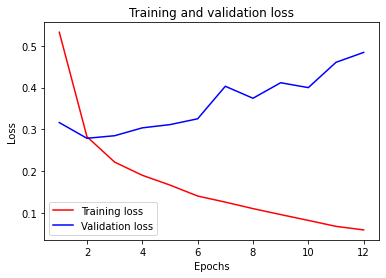

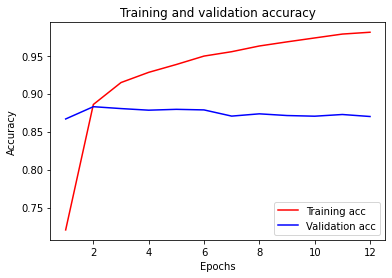

              precision    recall  f1-score   support

           0      0.897     0.865     0.881     12500
           1      0.869     0.901     0.885     12500

    accuracy                          0.883     25000
   macro avg      0.883     0.883     0.883     25000
weighted avg      0.883     0.883     0.883     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 20s 101ms/step - loss: 0.6843 - accuracy: 0.5322 - val_loss: 0.4167 - val_accuracy: 0.8121
Epoch 2/100
176/176 [==============================] - 17s 97ms/step - loss: 0.3299 - accuracy: 0.8579 - val_loss: 0.2907 - val_accuracy: 0.8790
Epoch 3/100
176/176 [==============================] - 17s 97ms/step - loss: 0.2248 - accuracy: 0.9136 - val_loss: 0.2799 - val_accuracy: 0.8828
Epoch 4/100
176/176 [==============================] - 17s 97ms/step - loss: 0.1804 - accuracy: 0.9340 - val_loss: 0.2885 - val_accuracy: 0.8794
Epoch 5/100
176/176 [==============================] - 17s 97ms/step - los

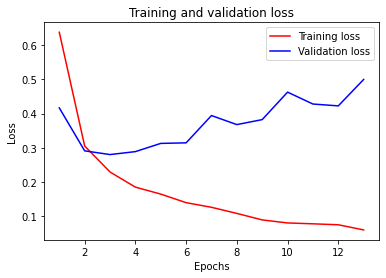

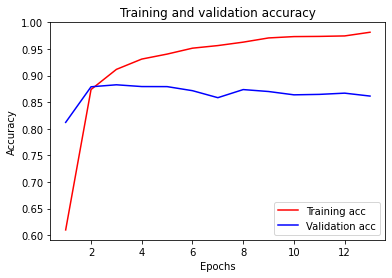

              precision    recall  f1-score   support

           0      0.903     0.857     0.880     12500
           1      0.864     0.908     0.886     12500

    accuracy                          0.883     25000
   macro avg      0.884     0.883     0.883     25000
weighted avg      0.884     0.883     0.883     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 21s 101ms/step - loss: 0.6743 - accuracy: 0.5453 - val_loss: 0.4565 - val_accuracy: 0.7879
Epoch 2/100
176/176 [==============================] - 17s 98ms/step - loss: 0.4226 - accuracy: 0.8121 - val_loss: 0.3013 - val_accuracy: 0.8734
Epoch 3/100
176/176 [==============================] - 17s 97ms/step - loss: 0.2604 - accuracy: 0.8945 - val_loss: 0.2837 - val_accuracy: 0.8830
Epoch 4/100
176/176 [==============================] - 17s 96ms/step - loss: 0.2149 - accuracy: 0.9161 - val_loss: 0.3017 - val_accuracy: 0.8754
Epoch 5/100
176/176 [==============================] - 17s 97ms/step - los

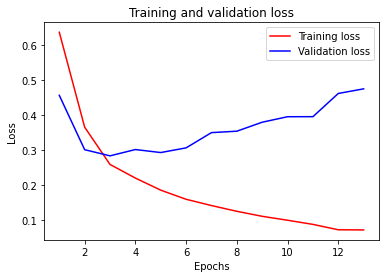

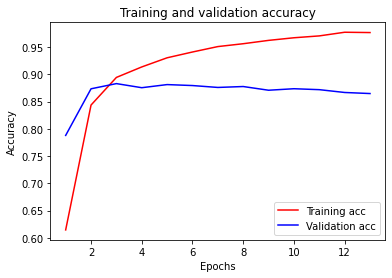

              precision    recall  f1-score   support

           0      0.900     0.862     0.880     12500
           1      0.867     0.904     0.885     12500

    accuracy                          0.883     25000
   macro avg      0.884     0.883     0.883     25000
weighted avg      0.884     0.883     0.883     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 21s 103ms/step - loss: 0.6589 - accuracy: 0.5810 - val_loss: 0.3728 - val_accuracy: 0.8340
Epoch 2/100
176/176 [==============================] - 17s 99ms/step - loss: 0.3346 - accuracy: 0.8647 - val_loss: 0.3041 - val_accuracy: 0.8722
Epoch 3/100
176/176 [==============================] - 17s 99ms/step - loss: 0.2397 - accuracy: 0.9060 - val_loss: 0.3082 - val_accuracy: 0.8717
Epoch 4/100
176/176 [==============================] - 17s 98ms/step - loss: 0.2020 - accuracy: 0.9236 - val_loss: 0.3102 - val_accuracy: 0.8759
Epoch 5/100
176/176 [==============================] - 17s 97ms/step - los

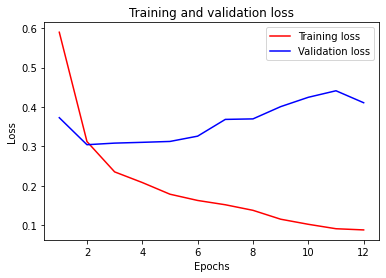

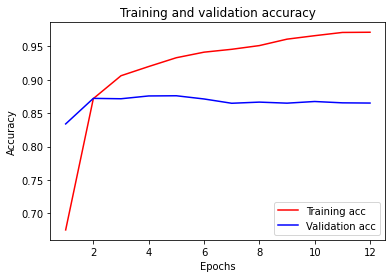

              precision    recall  f1-score   support

           0      0.904     0.833     0.867     12500
           1      0.845     0.911     0.877     12500

    accuracy                          0.872     25000
   macro avg      0.875     0.872     0.872     25000
weighted avg      0.875     0.872     0.872     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 20s 102ms/step - loss: 0.6626 - accuracy: 0.5786 - val_loss: 0.4761 - val_accuracy: 0.8021
Epoch 2/100
176/176 [==============================] - 17s 100ms/step - loss: 0.4422 - accuracy: 0.8149 - val_loss: 0.3238 - val_accuracy: 0.8622
Epoch 3/100
176/176 [==============================] - 17s 98ms/step - loss: 0.2878 - accuracy: 0.8848 - val_loss: 0.2916 - val_accuracy: 0.8768
Epoch 4/100
176/176 [==============================] - 17s 99ms/step - loss: 0.2290 - accuracy: 0.9130 - val_loss: 0.2999 - val_accuracy: 0.8735
Epoch 5/100
176/176 [==============================] - 17s 98ms/step - lo

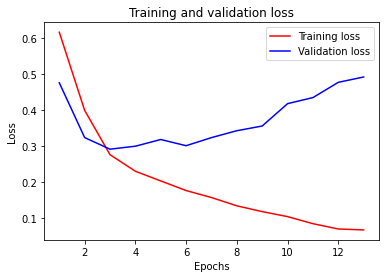

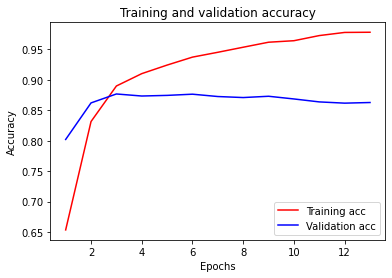

              precision    recall  f1-score   support

           0      0.869     0.888     0.878     12500
           1      0.885     0.866     0.875     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 21s 102ms/step - loss: 0.6548 - accuracy: 0.5843 - val_loss: 0.3281 - val_accuracy: 0.8582
Epoch 2/100
176/176 [==============================] - 17s 99ms/step - loss: 0.2883 - accuracy: 0.8831 - val_loss: 0.2916 - val_accuracy: 0.8808
Epoch 3/100
176/176 [==============================] - 17s 99ms/step - loss: 0.2231 - accuracy: 0.9144 - val_loss: 0.2888 - val_accuracy: 0.8784
Epoch 4/100
176/176 [==============================] - 17s 98ms/step - loss: 0.1823 - accuracy: 0.9336 - val_loss: 0.3133 - val_accuracy: 0.8700
Epoch 5/100
176/176 [==============================] - 17s 98ms/step - los

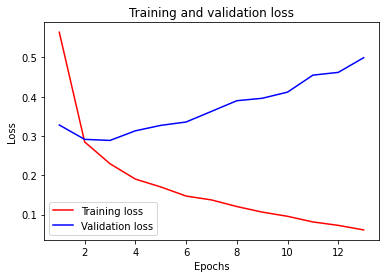

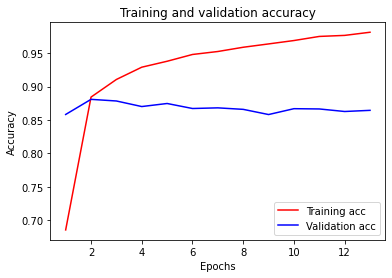

              precision    recall  f1-score   support

           0      0.890     0.864     0.877     12500
           1      0.868     0.893     0.880     12500

    accuracy                          0.878     25000
   macro avg      0.879     0.878     0.878     25000
weighted avg      0.879     0.878     0.878     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 20s 101ms/step - loss: 0.6318 - accuracy: 0.5890 - val_loss: 0.3103 - val_accuracy: 0.8700
Epoch 2/100
176/176 [==============================] - 17s 97ms/step - loss: 0.2621 - accuracy: 0.8941 - val_loss: 0.2803 - val_accuracy: 0.8837
Epoch 3/100
176/176 [==============================] - 17s 98ms/step - loss: 0.1978 - accuracy: 0.9237 - val_loss: 0.2854 - val_accuracy: 0.8858
Epoch 4/100
176/176 [==============================] - 17s 99ms/step - loss: 0.1716 - accuracy: 0.9355 - val_loss: 0.2954 - val_accuracy: 0.8820
Epoch 5/100
176/176 [==============================] - 17s 99ms/step - los

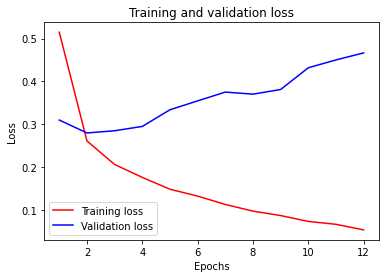

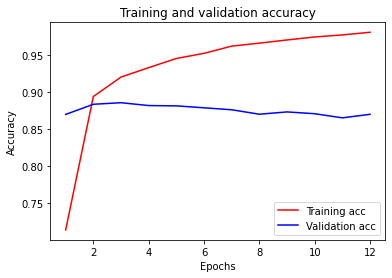

              precision    recall  f1-score   support

           0      0.913     0.848     0.879     12500
           1      0.858     0.919     0.888     12500

    accuracy                          0.884     25000
   macro avg      0.886     0.884     0.884     25000
weighted avg      0.886     0.884     0.884     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 21s 103ms/step - loss: 0.6295 - accuracy: 0.6095 - val_loss: 0.3444 - val_accuracy: 0.8534
Epoch 2/100
176/176 [==============================] - 18s 100ms/step - loss: 0.2756 - accuracy: 0.8902 - val_loss: 0.2969 - val_accuracy: 0.8742
Epoch 3/100
176/176 [==============================] - 18s 100ms/step - loss: 0.2108 - accuracy: 0.9179 - val_loss: 0.3125 - val_accuracy: 0.8738
Epoch 4/100
176/176 [==============================] - 17s 99ms/step - loss: 0.1715 - accuracy: 0.9344 - val_loss: 0.3008 - val_accuracy: 0.8776
Epoch 5/100
176/176 [==============================] - 17s 99ms/step - l

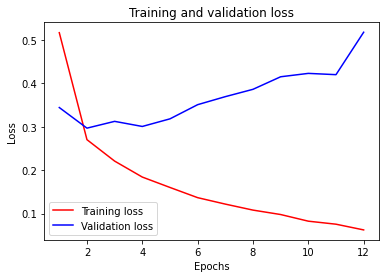

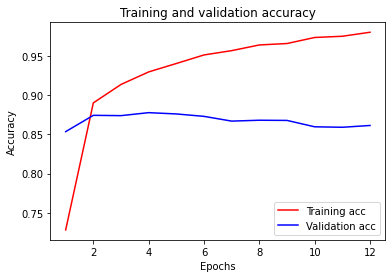

              precision    recall  f1-score   support

           0      0.840     0.924     0.880     12500
           1      0.915     0.824     0.868     12500

    accuracy                          0.874     25000
   macro avg      0.878     0.874     0.874     25000
weighted avg      0.878     0.874     0.874     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 21s 103ms/step - loss: 0.6451 - accuracy: 0.5954 - val_loss: 0.3507 - val_accuracy: 0.8444
Epoch 2/100
176/176 [==============================] - 17s 100ms/step - loss: 0.2996 - accuracy: 0.8774 - val_loss: 0.3220 - val_accuracy: 0.8606
Epoch 3/100
176/176 [==============================] - 17s 99ms/step - loss: 0.2336 - accuracy: 0.9122 - val_loss: 0.2946 - val_accuracy: 0.8769
Epoch 4/100
176/176 [==============================] - 17s 99ms/step - loss: 0.1886 - accuracy: 0.9302 - val_loss: 0.3074 - val_accuracy: 0.8722
Epoch 5/100
176/176 [==============================] - 18s 100ms/step - l

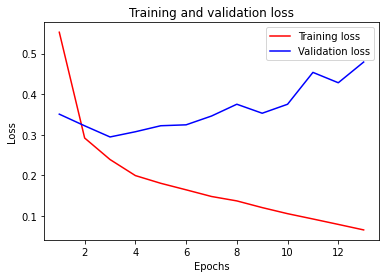

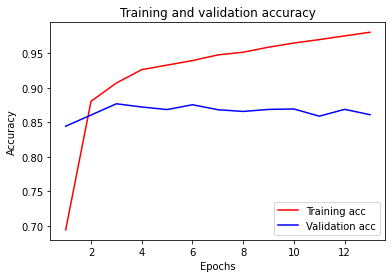

              precision    recall  f1-score   support

           0      0.874     0.881     0.877     12500
           1      0.880     0.873     0.876     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 21s 105ms/step - loss: 0.6671 - accuracy: 0.5708 - val_loss: 0.4161 - val_accuracy: 0.8021
Epoch 2/100
176/176 [==============================] - 17s 98ms/step - loss: 0.3739 - accuracy: 0.8366 - val_loss: 0.3008 - val_accuracy: 0.8720
Epoch 3/100
176/176 [==============================] - 17s 98ms/step - loss: 0.2401 - accuracy: 0.9069 - val_loss: 0.2791 - val_accuracy: 0.8832
Epoch 4/100
176/176 [==============================] - 17s 98ms/step - loss: 0.1924 - accuracy: 0.9272 - val_loss: 0.2958 - val_accuracy: 0.8836
Epoch 5/100
176/176 [==============================] - 17s 98ms/step - lo

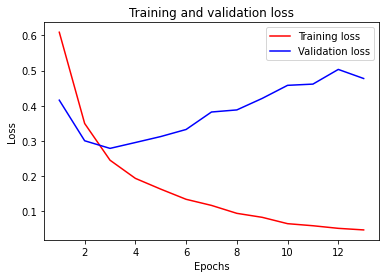

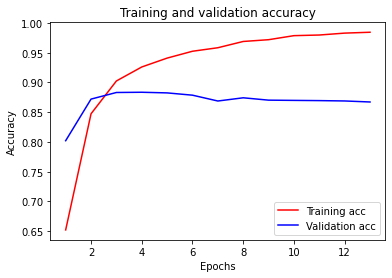

              precision    recall  f1-score   support

           0      0.900     0.862     0.881     12500
           1      0.867     0.905     0.886     12500

    accuracy                          0.883     25000
   macro avg      0.884     0.883     0.883     25000
weighted avg      0.884     0.883     0.883     25000


Average accuracy: 0.8832 (+/- 0.0046)
Average loss: 0.2818 (+/- 0.0088)
Average F1: 0.8806 (+/- 0.0061)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Bidirectional(LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True, return_sequences=True)),
    GlobalMaxPool1D(),
    Dense(units=64, activation="relu"),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
